<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea5/minimos4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
import os
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/datos/")
!ls

MinimosCuadratico.txt  MinimosLineal.txt


In [17]:
# Definir las rutas completas a los archivos en tu Drive
ruta_lineal = "/content/drive/MyDrive/Colab Notebooks/datos/MinimosLineal.txt"
ruta_cuadratico = "/content/drive/MyDrive/Colab Notebooks/datos/MinimosCuadratico.txt"

# Leer archivo 'MinimosLineal.txt' y guardarlo en un array
data_linear = np.loadtxt(ruta_lineal)

# Leer archivo 'MinimosCuadratico.txt' y guardarlo en otro array
data_quadratic = np.loadtxt(ruta_cuadratico)

# Verificación opcional: mostrar los primeros datos
print("Datos de MinimosLineal.txt:", data_linear)
print("Datos de MinimosCuadratico.txt:", data_quadratic)

Datos de MinimosLineal.txt: [[ 0.        -4.786585 ]
 [ 1.052632  -4.06587  ]
 [ 2.105263   0.1796494]
 [ 3.157895   2.719807 ]
 [ 4.210526   2.878523 ]
 [ 5.263158   4.527426 ]
 [ 6.315789   8.827734 ]
 [ 7.368421  10.97722  ]
 [ 8.421053  11.79944  ]
 [ 9.473684  14.52931  ]
 [10.52632   17.22463  ]
 [11.57895   21.0981   ]
 [12.63158   20.79109  ]
 [13.68421   26.08018  ]
 [14.73684   26.00302  ]
 [15.78947   30.14533  ]
 [16.84211   29.14247  ]
 [17.89474   33.28434  ]
 [18.94737   34.50524  ]
 [20.        36.56262  ]]
Datos de MinimosCuadratico.txt: [[  0.         -3.348886 ]
 [  0.5263158  10.779    ]
 [  1.052632   13.12721  ]
 [  1.578947   21.20879  ]
 [  2.105263   20.63223  ]
 [  2.631579   34.11089  ]
 [  3.157895   60.66644  ]
 [  3.684211   55.07888  ]
 [  4.210526   81.89598  ]
 [  4.736842   96.83438  ]
 [  5.263158  117.5549   ]
 [  5.789474  130.5394   ]
 [  6.315789  147.7079   ]
 [  6.842105  185.1728   ]
 [  7.368421  210.7779   ]
 [  7.894737  235.0856   ]
 [  8.4

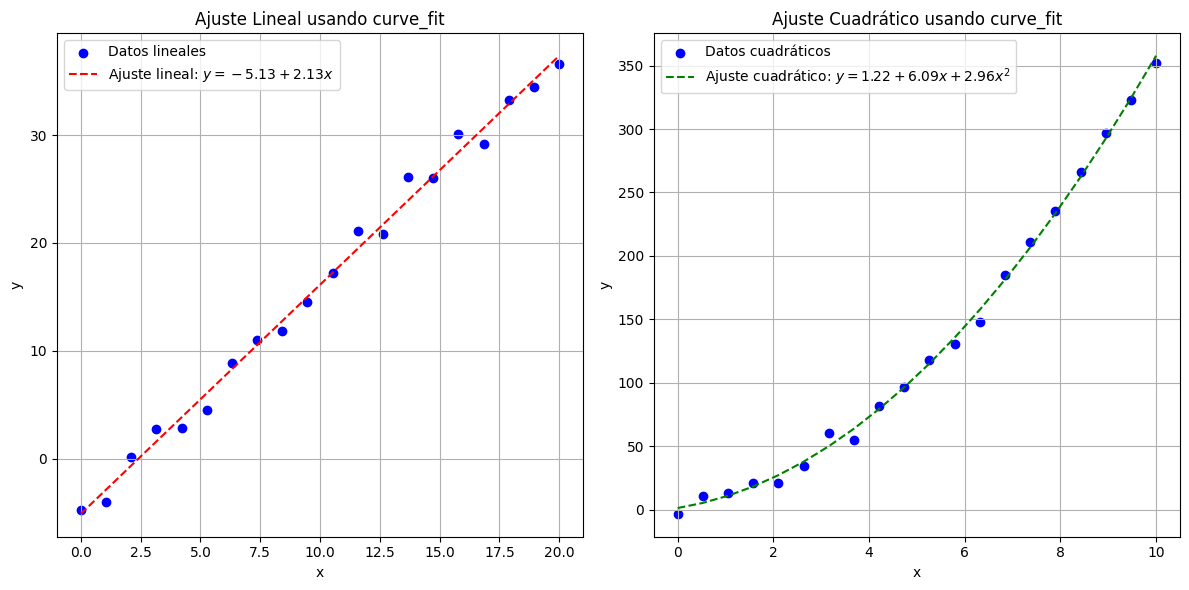

Parámetros del ajuste lineal con curve_fit:
a0 = -5.1292, a1 = 2.1250

Parámetros del ajuste cuadrático con curve_fit:
a0 = 1.2213, a1 = 6.0908, a2 = 2.9566


In [19]:
x_data_linear, y_data_linear = data_linear[:, 0], data_linear[:, 1]
x_data_quad, y_data_quad = data_quadratic[:, 0], data_quadratic[:, 1]

# Definir las funciones de ajuste
def linear_fit(x, a0, a1):
    return a0 + a1 * x

def quadratic_fit(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

# Ajuste lineal con curve_fit para los datos lineales
params_linear, _ = curve_fit(linear_fit, x_data_linear, y_data_linear)
a0_linear_cf, a1_linear_cf = params_linear

# Ajuste cuadrático con curve_fit para los datos cuadráticos
params_quadratic, _ = curve_fit(quadratic_fit, x_data_quad, y_data_quad)
a0_quad_cf, a1_quad_cf, a2_quad_cf = params_quadratic

# Generar valores ajustados para graficar
y_fit_linear_cf = linear_fit(x_data_linear, *params_linear)
y_fit_quad_cf = quadratic_fit(x_data_quad, *params_quadratic)

# Graficar los datos y ambos ajustes
plt.figure(figsize=(12, 6))

# Ajuste lineal
plt.subplot(1, 2, 1)
plt.scatter(x_data_linear, y_data_linear, color='blue', label='Datos lineales')
plt.plot(x_data_linear, y_fit_linear_cf, color='red', linestyle='--', label=f'Ajuste lineal: $y = {a0_linear_cf:.2f} + {a1_linear_cf:.2f}x$')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Ajuste Lineal usando curve_fit")
plt.legend()
plt.grid(True)

# Ajuste cuadrático
plt.subplot(1, 2, 2)
plt.scatter(x_data_quad, y_data_quad, color='blue', label='Datos cuadráticos')
plt.plot(x_data_quad, y_fit_quad_cf, color='green', linestyle='--', label=f'Ajuste cuadrático: $y = {a0_quad_cf:.2f} + {a1_quad_cf:.2f}x + {a2_quad_cf:.2f}x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Ajuste Cuadrático usando curve_fit")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros del ajuste lineal con curve_fit:")
print(f"a0 = {a0_linear_cf:.4f}, a1 = {a1_linear_cf:.4f}")

print("\nParámetros del ajuste cuadrático con curve_fit:")
print(f"a0 = {a0_quad_cf:.4f}, a1 = {a1_quad_cf:.4f}, a2 = {a2_quad_cf:.4f}")